## Rivers

- [Hydrosheds Rivers](https://www.hydrosheds.org/products/hydrorivers)

In [1]:
import geopandas as gpd

# Data source - https://www.hydrosheds.org/products/hydrorivers
samerica_rivers = gpd.read_file("../resources/data/a00000009.gdbtable")

print(samerica_rivers)

         HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM  DIST_DN_KM  DIST_UP_KM  \
0        60000001          0  60000001       0.97         0.0         6.5   
1        60000002          0  60000002       1.16         0.0         5.3   
2        60000003          0  60000003       3.37         0.0         7.2   
3        60000004          0  60000004       3.37         0.0         6.3   
4        60000005          0  60000005       3.07         0.0         7.9   
...           ...        ...       ...        ...         ...         ...   
1620958  61620959          0  61620959       1.72         0.0         5.4   
1620959  61620960          0  61620960       0.91         0.0         3.5   
1620960  61620961          0  61620961       1.72         0.0         4.2   
1620961  61620962          0  61620962       0.80         0.0         3.5   
1620962  61620963          0  61620963       2.57         0.0         4.2   

         CATCH_SKM  UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ORD_STRA  ORD_CLAS  

In [2]:
samerica_rivers = samerica_rivers.loc[samerica_rivers['ORD_FLOW'] < 7]

In [3]:
# Data source - https://github.com/nvkelso/natural-earth-vector/blob/master/10m_cultural/ne_10m_admin_0_countries.shp
country_shapefiles = gpd.read_file("../resources/data/ne_10m_admin_0_countries.shp")
samerica = country_shapefiles.loc[country_shapefiles['ADMIN'] == 'Brazil']

In [4]:
samerica_rivers = gpd.sjoin(samerica_rivers, samerica, predicate='within')
samerica_rivers = samerica_rivers[['DIST_UP_KM', 'geometry', 'ORD_FLOW']]

In [5]:
samerica_rivers.to_file("../resources/data/rivers.geojson", driver="GeoJSON")

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [6]:
samerica_rivers.to_parquet("../resources/data/rivers.parquet.gzip", compression='gzip')

C:\Users\symmy\AppData\Local\Temp\ipykernel_2516\2194107613.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  samerica_rivers.to_parquet("../resources/data/rivers.parquet.gzip", compression='gzip')


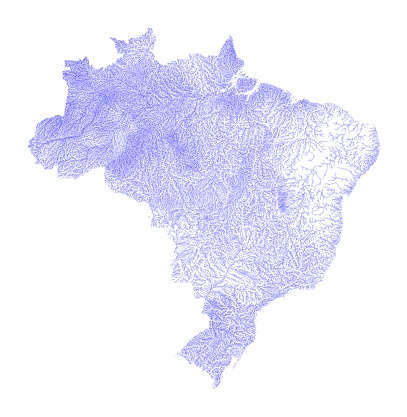

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(5, 7)

samerica_rivers.plot(ax=ax, color='blue', lw=0.1)


ax.axis('off')
plt.show()

## Forests 

- [Forests Density Raster](https://github.com/globalmaps/gm_ve_v1)

In [8]:
import os
from rasterio.enums import Resampling
from rasterio.transform import Affine
import rasterio

scale = 10
with rasterio.open("../resources/data/gm_ve_v1.tif") as src:
    new_height = src.height // scale
    new_width = src.width // scale
    # Read and downsample
    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.mode
    )
    data[data > 100] = 0
    # Calculate the new transform
    new_transform = src.transform * Affine.scale(scale)

    # Save the downsampled image
    profile = src.profile
    profile.update({
        'height': new_height,
        'width': new_width,
        'transform': new_transform
    })
    with rasterio.open("../resources/data/downsampled_forest.tif", 'w', **profile) as dst:
        dst.write(data)


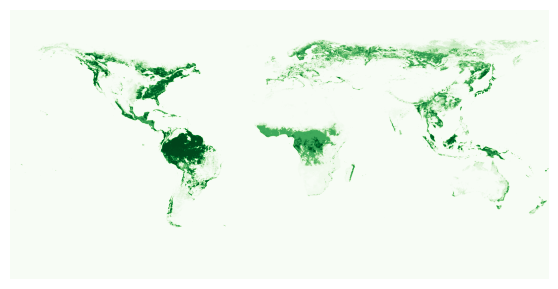

In [9]:
from rasterio.plot import show
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
fig.set_size_inches(7, 3.5)
show(data, ax=ax, cmap='Greens')
ax.axis('off')
plt.show()

In [10]:

import os
from rasterio.enums import Resampling
from rasterio.transform import Affine
import rasterio

scale = 10
with rasterio.open("../resources/data/ETOPO1_Bed_g_geotiff.tif") as src:
    new_height = src.height // scale
    new_width = src.width // scale
    # Read and downsample
    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.mode
    )
    # Calculate the new transform
    new_transform = src.transform * Affine.scale(scale)

    # Save the downsampled image
    profile = src.profile
    profile.update({
        'height': new_height,
        'width': new_width,
        'transform': new_transform
    })
    with rasterio.open("../resources/data/downsampled_topography.tif", 'w', **profile) as dst:
        dst.write(data)


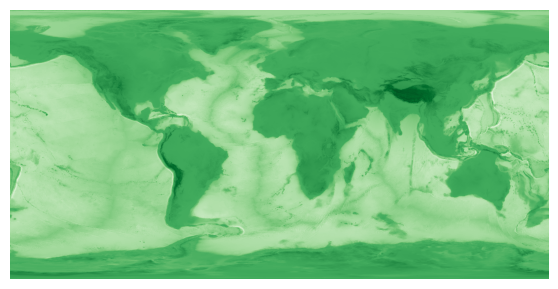

In [11]:
from rasterio.plot import show
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
fig.set_size_inches(7, 3.5)
show(data, ax=ax, cmap='Greens')
ax.axis('off')
plt.show()